# Problem Statement
• Top 5 Best performing Products according to customer ratings   
• Top 5 worst performing Products according to customer ratings  
• Overall sentiments – either positive or negative   
• Formation of Word cloud to see most buzz words used for the products positive and negative  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

/kaggle/input/ayushi-dataset-for-wordcloud-and-sentiment/SP-500-Index-Constituents-as-of-Sept-1-2021.xlsx
/kaggle/input/ayushi-dataset-for-wordcloud-and-sentiment/Data1.csv


In [2]:
df=pd.read_csv('/kaggle/input/ayushi-dataset-for-wordcloud-and-sentiment/Data1.csv' , usecols = ['title','body','rating','product_handle','product_id'] )
df.sample(5)

,title,body,rating,product_id,product_handle
4031,Reduces dark spots,It has helped in reducing my dark spots. I use...,5,3.780000e+12,naked-detox-green-tea-face-serum
7684,NaN,Body Polishing Kit,4,2.070000e+12,body-polishing-kit-coffee-body-scrub-choco-bod...
8670,PRODUCT THAT ONE SHOULD HAVE,The products which i have ordered and even the...,5,4.820000e+12,espresso-body-de-tan-kit
3694,NaN,Coffee De-stress - Gift Kit,4,4.520000e+12,coffee-de-stress-gift-kit
5958,Its a nice product,Its help to reduce our strech mark.No side eff...,5,2.070000e+12,naked-and-rich-choco-body-butter-with-caramel


In [3]:
## I saw some Nan values so thought of checking for MISSING VALUES
df.isnull().mean()*100

title             37.748139
body               0.000000
rating             0.000000
product_id         0.000000
product_handle     0.000000
dtype: float64

* 37.94% values in `Title` are missing
* 29.57% Values are missing in `Location`  
> Location is missing because ip_address was missing

`Suggestion` Drop title and location but before that check ***Who leave title bank does this depend on rating***

### 

<AxesSubplot:>

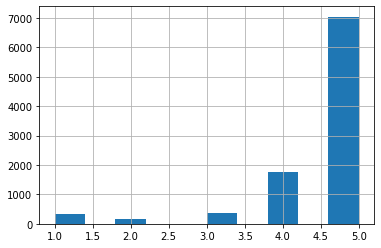

In [4]:
df.rating.hist()

## Rating analysis

In [5]:
a,b=df[df['rating']<4].shape
c,d =df.shape
print('Percentage rating below 4 = ', (a/c)*100)

Percentage rating below 4 =  8.891645988420183


In [6]:
a,b=df[df['rating']<3].shape
c,d =df.shape
print('Percentage rating below 3 = ', (a/c)*100)

Percentage rating below 3 =  4.9421009098428454


In [7]:
a,b=df[df['rating']<2].shape
c,d =df.shape
print('Percentage rating below 2 = ', (a/c)*100)

Percentage rating below 2 =  3.287841191066997


* Turns out 8.89% customers are unsatisfied with our products who rate our product less than 4
* 4.942% Percent rating are below 3
* 3.287% Percent rating are below 2

In [8]:
df[df['rating']<4]

,title,body,rating,product_id,product_handle
29,Clear Face,Works well as a moisturizer for skin. Smells a...,3,1.490000e+11,shea-caffeine-cold-cream-with-vitamin-e
34,nourishes skin well,it nourishes my skin well. Recommended to all,3,1.510000e+12,choco-caffeine-face-scrub-with-argan-oil
39,Face glow mask was worst,It was really bad,1,1.500000e+11,choco-caffeine-glow-face-pack-with-aloe-and-se...
69,Not satisfied,Ordered their products twice....2 months back....,1,2.070000e+12,body-polishing-kit-coffee-body-scrub-choco-bod...
74,Disappointed,"My skin is combination and highly sensitive, i...",2,2.070000e+12,deep-pore-cleansing-regime-coffee-face-care
...,...,...,...,...,...
9611,NaN,"Naked & Raw Coffee Scalp Scrub, 250 gm | Sulph...",1,6.540000e+12,naked-raw-coffee-scalp-scrub
9622,NaN,It's really effective,1,4.470000e+12,cellulite-stretch-mark-reduction-duo
9627,Body cream,It's a very soft ang nice smell,1,6.540000e+12,summer-body-kit
9640,Cafelicious,Loved the coffee aroma and the smooth hair aft...,2,6.610000e+12,naked-raw-coffee-hair-conditioner-with-pro-vit...


In [9]:
### Rating = 1
### index no = 9622
df.iloc[9622]

title                                              NaN
body                             It's really effective
rating                                               1
product_id                             4470000000000.0
product_handle    cellulite-stretch-mark-reduction-duo
Name: 9622, dtype: object

**Rating= 1** index no = 9622, this seems she `gave rating= 1 by mistake`

In [10]:
display(df.iloc[9649])
print()
print("This is really confusing customer seem to be happy about the product but they rate the product 1, below is customer's review")
print(df.iloc[9649].body)

title                            Body Toning & Polishing kit review
body              I'm really glad I came across such an amazing ...
rating                                                            1
product_id                                          4420000000000.0
product_handle                            body-toning-polishing-kit
Name: 9649, dtype: object


This is really confusing customer seem to be happy about the product but they rate the product 1, below is customer's review
I'm really glad I came across such an amazing company. I love the products and their textures and really they are very skin friendly. Worked magically for me.


In [11]:
### Rating = 2 
### looking at one of the bad review
df.iloc[74].body

'My skin is combination and highly sensitive, i bought Face wash.Scrub.Pack. combo, today is 4th day of use, my skin is getting rash all over my face, skin tone is getting 2 shade derker and oily. Very disappointed.'

In [12]:
display(df.iloc[39])

title                                      Face glow mask was worst
body                                              It was really bad
rating                                                            1
product_id                                           150000000000.0
product_handle    choco-caffeine-glow-face-pack-with-aloe-and-se...
Name: 39, dtype: object

In [13]:
df[df['rating']>=4]

,title,body,rating,product_id,product_handle
0,Must try♥️👌👌,Its my honest review about this product...\r\n...,5,2.070000e+12,deep-pore-cleansing-regime-coffee-face-care
1,Awesome products,I have started using it few days ago. After us...,5,4.470000e+12,cellulite-stretch-mark-reduction-duo
2,NaN,Cellulite & Stretch Mark Reduction Duo,5,4.470000e+12,cellulite-stretch-mark-reduction-duo
3,Believer,It's always difficult finding a face wash that...,4,7.967813e+09,face-wash
4,Amazing,The Way this Face Wash treated my skin is very...,4,7.967813e+09,face-wash
...,...,...,...,...,...
9667,Amazing just buy it.....,It's a awesome...nice results after two washes,5,1.510000e+12,naked-raw-coffee-body-scrub-with-coconut
9668,NaN,"Coffee Scalp Scrub, 250 gm | Sulphate & Silico...",4,6.540000e+12,naked-raw-coffee-scalp-scrub
9669,About the Mask.,It's been two times I used the coffee mask. Al...,5,2.070000e+12,naked-and-raw-coffee-face-mask-with-cocoa
9670,NaN,Mild Brew - Latte Gift Kit,5,6.590000e+12,mild-brew-latte-gift-kit


In [14]:
## Lets check total no of unique products
x= df.product_handle.nunique()
y= df.product_id.nunique()
print('Total no of Products in df        : ', y)
print('Total no of Product handles in df : ', x)

Total no of Products in df        :  51
Total no of Product handles in df :  185


# Top 10 products 

In [15]:
product_group =df.groupby('product_id').mean()
product_handle =df.groupby('product_handle').mean()
#print(product_group)

In [16]:
d= product_group.sort_values(by="rating", ascending=False)
e = product_handle.sort_values(by="rating", ascending=False)
print('Top 10 products with product id','\n')
display(d.head(10))
print('Top 10 products with product handle','\n')
display(e.head(10))

Top 10 products with product id 



,rating
product_id,
4.160000e+12,5.000000
6.600000e+12,5.000000
3.770000e+12,5.000000
6.550000e+12,5.000000
2.000000e+12,5.000000
4.830000e+12,5.000000
7.440000e+11,5.000000
4.780000e+12,4.909091
6.590000e+12,4.859155


Top 10 products with product handle 



,rating,product_id
product_handle,,
wooden-head-massage-comb,5.0,6.610000e+12
choco-deep-nourishing-kit,5.0,4.470000e+12
coffee-body-care-shots-1,5.0,4.820000e+12
must-have-coffee-face-care-shots-1,5.0,4.820000e+12
mocha-coffee-face-mask-with-cocoa-bentonite-kaolin-clay-for-skin-repair-100gm,5.0,6.580000e+12
mini-coffee-hero-scrubs,5.0,6.550000e+12
coffee-choco-kit,5.0,4.470000e+12
coffee-choco-multi-masking-kit,5.0,4.780000e+12
mcaffeine-skin-care-discovery-kit,5.0,2.000000e+12


## Worst 10 products

In [17]:
d1= d.tail(10)
e1= e.tail(10)
print('Worst 10 products with product id','\n')
display(d1.sort_values(by="rating"))
print('Worst 10 products with product handle','\n')
display(e1.sort_values(by="rating"))

Worst 10 products with product id 



,rating
product_id,
2.590000e+11,3.000000
3.620000e+12,3.000000
1.490000e+11,3.950000
4.430000e+12,4.000000
9.125116e+09,4.000000
8.238876e+09,4.000000
9.906463e+09,4.000000
8.066182e+09,4.000000
7.967813e+09,4.050000


Worst 10 products with product handle 



,rating,product_id
product_handle,,
mcaffeine-perfect-hair-care-combo-kit-hibiscus-caffeine-shampoo-hibiscus-caffeine-conditioner-sls-and-paraben-free,3.000000,2.590000e+11
mcaffeine-perk-up-towel,3.000000,1.990000e+12
coffee-shots,3.000000,3.620000e+12
green-tea-hair-detox-gift-kit,3.000000,3.720000e+12
the-big-brew-scoop,3.000000,6.540000e+12
acne-control-kit-cappuccino-coffee-routine,3.400000,6.580000e+12
complete-coffee-moisturization,3.500000,4.470000e+12
coffee-hand-foot-care,3.666667,4.470000e+12
green-tea-hair-detox-kit,3.666667,3.500000e+12


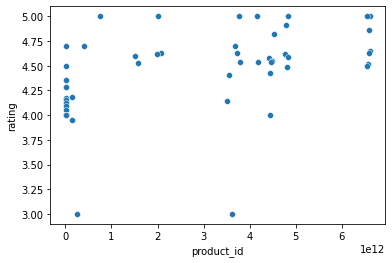

In [18]:
sns.scatterplot(x='product_id', y ='rating', data=d);

### lowest `avg rating` is 3

# Creating word cloud

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

In [20]:
### Craeting 2 dataframe 
# 1 with rating above and equal to 4
# 2nd below 4
df1=df[df['rating']>=4]
df2=df[df['rating']<4]
df2=df[df['rating']<3]

In [21]:
####### Converting data frame to string #########
body1= df1.body.to_string(index=False)
body2= df2.body.to_string(index=False)
body3= df2.body.to_string(index=False)

### Removing NaN form title as title contains 38% NaN values

title1= df1.title.dropna().to_string(index=False)
title2= df2.title.dropna().to_string(index=False)
title3= df2.title.dropna().to_string(index=False)


In [22]:
wc= WordCloud(background_color='white',stopwords=stopwords, height=1080, width =1080)

## Word count for body

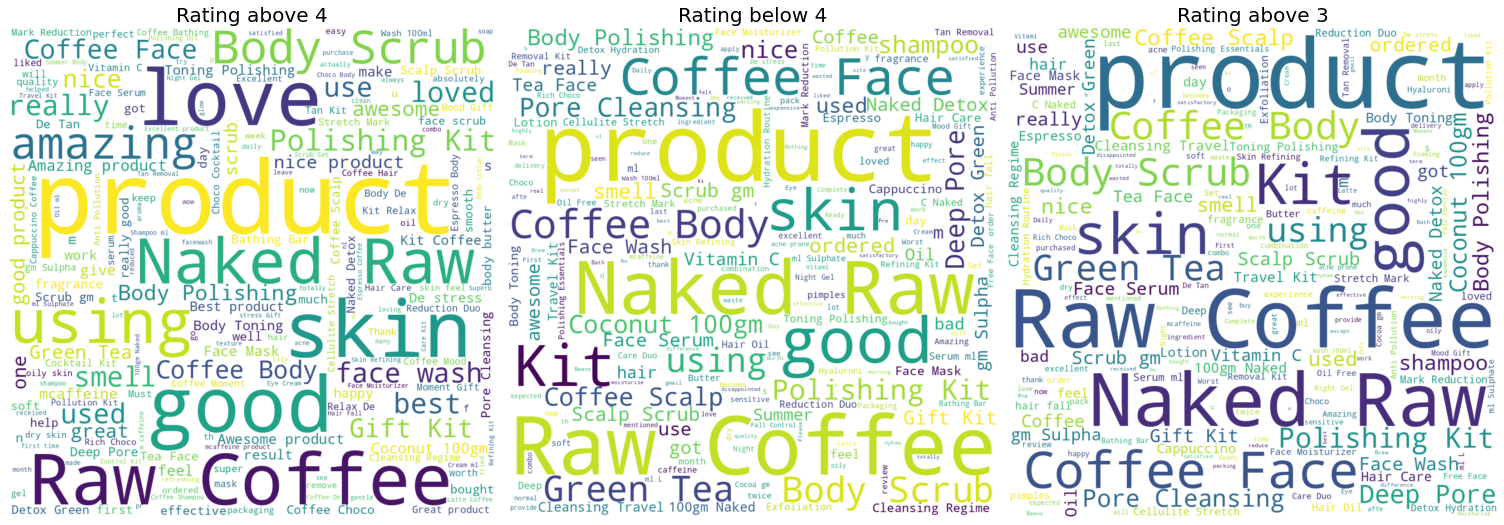

In [23]:
plt.figure(figsize=(21,14))
plt.subplot(1,3,1)
wc.generate(body1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Rating above 4", fontsize=20)
wc.to_file('body1.png')

plt.subplot(1,3,2)
wc.generate(body2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Rating below 4", fontsize=20)
wc.to_file('body2.png')

plt.subplot(1,3,3)
wc.generate(body3)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Rating above 3", fontsize=20)
wc.to_file('body3.png')

plt.tight_layout()

## Word cloud for title

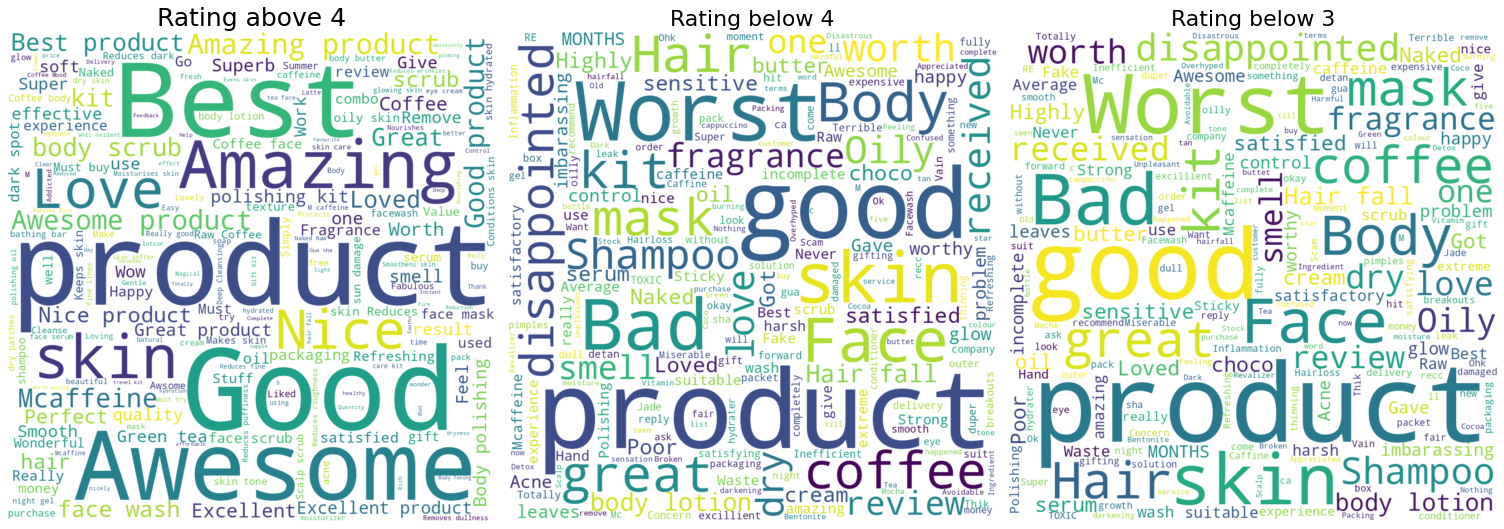

In [24]:
plt.figure(figsize=(21,14))
plt.subplot(1,3,1)
wc.generate(title1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Rating above 4", fontsize=25)
wc.to_file('title1.png')

plt.subplot(1,3,2)
wc.generate(title2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Rating below 4", fontsize=22)
wc.to_file('title2.png')

plt.subplot(1,3,3)
wc.generate(title3)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Rating below 3", fontsize=22)
wc.to_file('title3.png')

plt.tight_layout()

# Perfroming Sentiment Analysis of products

## Using Blob

In [25]:
from textblob import TextBlob

In [26]:
f1='I have started using it few days ago. After using them my skin has become very soft. And I have noted that my stretch marks have also become less visible. Really good products. Worth the money.'
f2='The food at Radision was very good'
blob1= TextBlob(f1)
blob2= TextBlob(f2)
print(blob1.sentiment)
print(blob2.sentiment)

# Polarity : tells how +ve the sentence is or how -ve is the sentence
# Subjectivity expresses about personal feeling

Sentiment(polarity=0.15266666666666664, subjectivity=0.26433333333333336)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)


In [27]:
t=TextBlob(df.body.iloc[1])
type(t.sentiment)
print(t.sentiment)
t.sentiment[1]

Sentiment(polarity=0.15266666666666664, subjectivity=0.26433333333333336)


0.26433333333333336

In [28]:
%%time
### Now lets try this on our database
for i in range(len(df)):
    t=TextBlob(df.body.iloc[i])
    p=t.sentiment[0]
    s=t.sentiment[1]
    df['polarity'].iloc[i]= p
    df['subjectivity'].iloc[i]=s
df

KeyError: 'polarity'

In [29]:
df.body.iloc[3]

"It's always difficult finding a face wash that will do justice to people with combination skin. But Fresh Pop Caffeine Face Wash has taken all my worries away!  believer"

In [30]:
df.title.iloc[2]

nan

In [31]:
df[df['title']==x]

,title,body,rating,product_id,product_handle


In [32]:
df['ptitle']= 0
df['stitle']=0

In [33]:
type(df.title.iloc[3])

str

In [34]:
########### For Title #############
for i in range(len(df)):
    if type(df.title.iloc[i])==float:
        df['ptitle'].iloc[i]= 0
        df['stitle'].iloc[i]= 0
    else:
        t=TextBlob(df.title.iloc[i])
        p=t.sentiment[0]
        s=t.sentiment[1]
        df['ptitle'].iloc[i]= p
        df['stitle'].iloc[i]=s
df

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,title,body,rating,product_id,product_handle,ptitle,stitle
0,Must try♥️👌👌,Its my honest review about this product...\r\n...,5,2.070000e+12,deep-pore-cleansing-regime-coffee-face-care,0.0,0.0
1,Awesome products,I have started using it few days ago. After us...,5,4.470000e+12,cellulite-stretch-mark-reduction-duo,1.0,1.0
2,NaN,Cellulite & Stretch Mark Reduction Duo,5,4.470000e+12,cellulite-stretch-mark-reduction-duo,0.0,0.0
3,Believer,It's always difficult finding a face wash that...,4,7.967813e+09,face-wash,0.0,0.0
4,Amazing,The Way this Face Wash treated my skin is very...,4,7.967813e+09,face-wash,0.6,0.9
...,...,...,...,...,...,...,...
9667,Amazing just buy it.....,It's a awesome...nice results after two washes,5,1.510000e+12,naked-raw-coffee-body-scrub-with-coconut,0.6,0.9
9668,NaN,"Coffee Scalp Scrub, 250 gm | Sulphate & Silico...",4,6.540000e+12,naked-raw-coffee-scalp-scrub,0.0,0.0
9669,About the Mask.,It's been two times I used the coffee mask. Al...,5,2.070000e+12,naked-and-raw-coffee-face-mask-with-cocoa,0.0,0.0
9670,NaN,Mild Brew - Latte Gift Kit,5,6.590000e+12,mild-brew-latte-gift-kit,0.0,0.0


## Using Naive Bayes

# Feature Engineering